# 优化算法

在深度学习中，随着网络的加深，目标函数不再是凸函数，优化曲面变得更复杂，别说寻找一个优秀的优化算法，完成正常的优化都变得困难。下面介绍常用的优化算法： 梯度下降法、动量法、共轭梯度法、自然梯度算法。

## 梯度下降法

在高等数学中，我们知道函数的梯度方向表示函数值增长速度最快的方向，那么和它相反的方向可以看作函数值减少速度最快的方向。当目标设定为求解目标函数最小值时，只要朝着梯度下降的方向前进，就能不断逼近最优值。下面我们用梯度下降法求解 $f(x)=x^2 - 2x + 1$ 的最小值：

In [5]:
def gd(x_start, step, epoch, g):
    """梯度下降函数
    
    计算函数的梯度
    
    Args:
         x_start: 初始值
         step: 步长
         epoch: 跌倒次数
         g: 梯度函数（求导）
    Returns:
         梯度值
    """
    x = x_start
    for i in range(epoch):
        grad = g(x)
        x -= grad * step
        print("[Epoch {0}] grad = {1}, x = {2}".format(i, grad, x))
        if abs(grad) < 1e-6:
            break
    return x
    

$f(x) = x^2 - 2x + 1$的梯度(求导)等于 $$g(x) = 2x - 2$$

In [18]:
def f(x):
    """目标函数
    
    目标函数式子
    
    Args:
        x: 输入变量
    Returns:
        y: 输出变量
    """
    y = x * x - 2 * x + 1
    return y
def g(x):
    """f(x)梯度
    
    Args:
        x: 输入变量
        y: f(x)的梯度
    """
    y = 2 * x - 2
    return y    

Text(0,0.5,'f(x)')

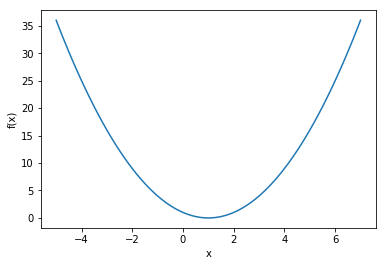

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5, 7, 100)
y = f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')

很直观的能够发现当$x=1$时，$f(x)$取得最小值。下面使用梯度下降法来求解：

In [23]:
gd(5, 0.1, 20, g)

[Epoch 0] grad = 8, x = 4.2
[Epoch 1] grad = 6.4, x = 3.56
[Epoch 2] grad = 5.12, x = 3.048
[Epoch 3] grad = 4.096, x = 2.6384
[Epoch 4] grad = 3.2767999999999997, x = 2.31072
[Epoch 5] grad = 2.6214399999999998, x = 2.0485759999999997
[Epoch 6] grad = 2.0971519999999995, x = 1.8388607999999997
[Epoch 7] grad = 1.6777215999999995, x = 1.6710886399999998
[Epoch 8] grad = 1.3421772799999996, x = 1.536870912
[Epoch 9] grad = 1.0737418239999998, x = 1.4294967295999998
[Epoch 10] grad = 0.8589934591999997, x = 1.34359738368
[Epoch 11] grad = 0.6871947673599998, x = 1.274877906944
[Epoch 12] grad = 0.5497558138879999, x = 1.2199023255552
[Epoch 13] grad = 0.4398046511103999, x = 1.17592186044416
[Epoch 14] grad = 0.35184372088831983, x = 1.1407374883553278
[Epoch 15] grad = 0.2814749767106557, x = 1.1125899906842622
[Epoch 16] grad = 0.22517998136852446, x = 1.0900719925474098
[Epoch 17] grad = 0.18014398509481966, x = 1.0720575940379278
[Epoch 18] grad = 0.14411518807585555, x = 1.057646075

1.0461168601842739

可以看到，初始值$x$从5除非，梯度值不断下降，经过20轮迭代，$x$不断逼近最优值$x=1$